In [ ]:
#pip install opendatasets

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/dataset/

/content/gdrive/MyDrive/Colab Notebooks/dataset


In [ ]:
%ls

 archive.zip                model2.keras                          one-indexed-files-notrash_val.txt
'garbage classification'/   model3.h5                             one-indexed-files.txt
'Garbage classification'/   model3.keras                          test1.jpg
 model/                     model.h5                              test2.jpg
 model1/                    model.keras                           test3.jpg
 model1.h5                  my_dir/                               test4.jpg
 model1.keras               one-indexed-files-notrash_test.txt    TrashBox_train_set/
 model2/                    one-indexed-files-notrash_train.txt   zero-indexed-files.txt


In [ ]:
# !unzip archive.zip

In [ ]:
import os
import keras


In [ ]:
base_path = "/content/gdrive/MyDrive/Colab Notebooks/dataset/Garbage classification/Garbage classification/"
#/content/garbage-classification/Garbage classification/Garbage classification

In [ ]:
categories = ['cardboard', 'glass', 'metal','paper','plastic','trash']

In [ ]:
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

In [ ]:
import re
filenames_list = []
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + category)

    filenames_list += filenames
    categories_list += [category] * len(filenames)

df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})
df = add_class_name_prefix(df, 'filename')

df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,filename,category
0,paper/paper214.jpg,paper
1,plastic/plastic124.jpg,plastic
2,glass/glass257.jpg,glass
3,glass/glass240.jpg,glass
4,glass/glass201.jpg,glass


In [ ]:
unique_class = df['category'].value_counts()

In [ ]:
unique_class

paper        594
glass        501
plastic      482
metal        410
cardboard    403
trash        137
Name: category, dtype: int64

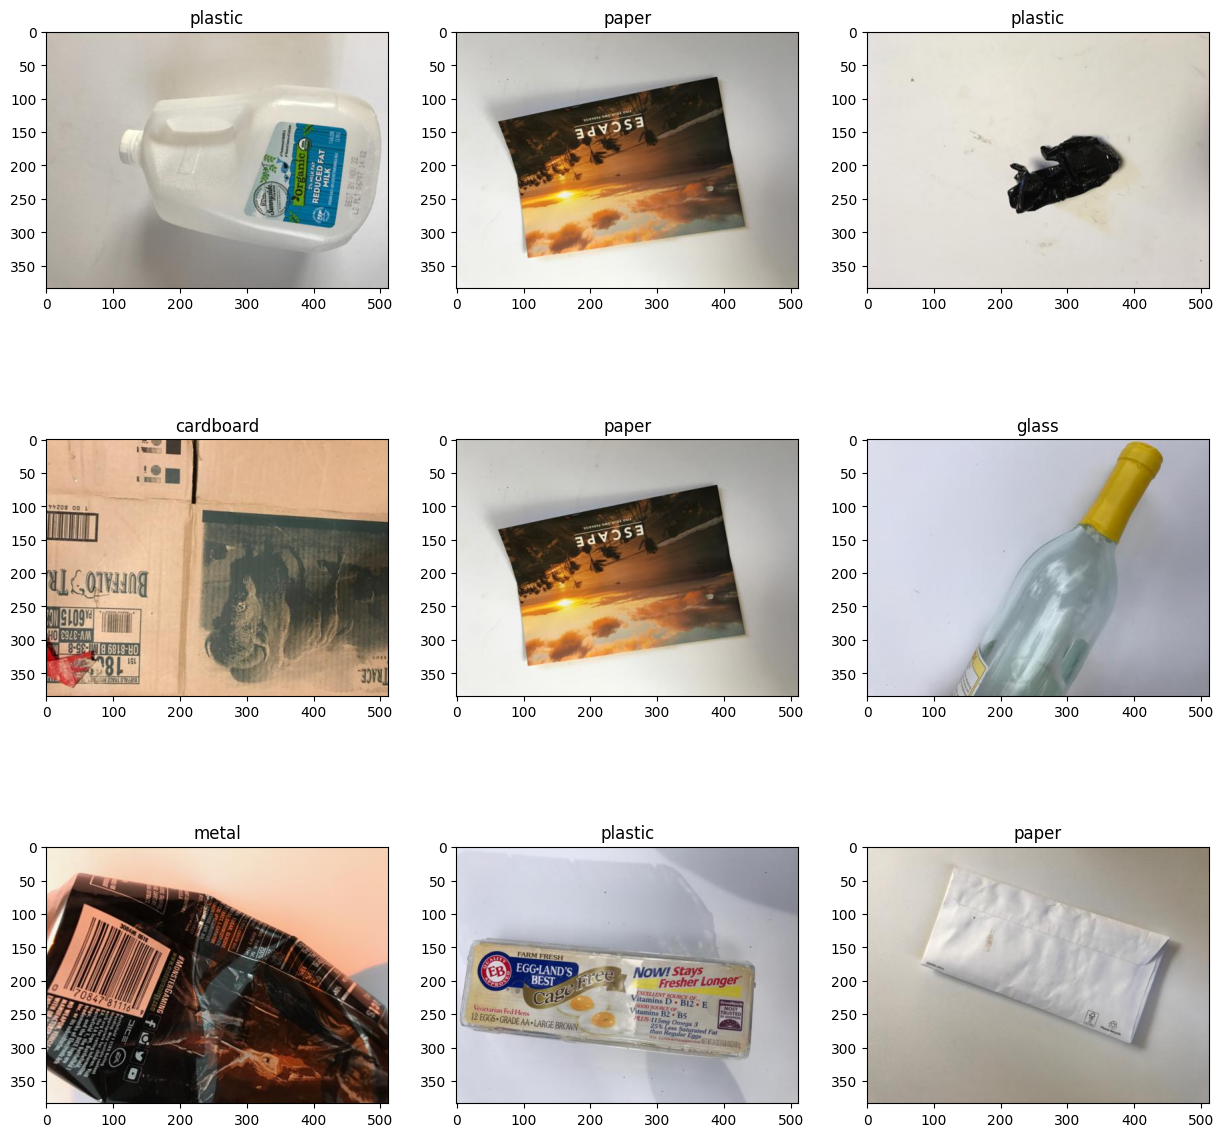

In [ ]:
import random
from keras.preprocessing import image
import keras.utils as image
plt.figure(figsize=(15,15))
for i in range(9):
    random_row = random.randint(0, len(df)-1)
    sample = df.iloc[random_row]
    random_image = image.load_img(base_path + sample['filename'])
    plt.subplot(330 + 1 + i)
    plt.title(sample['category'])
    plt.imshow(random_image)
plt.show()

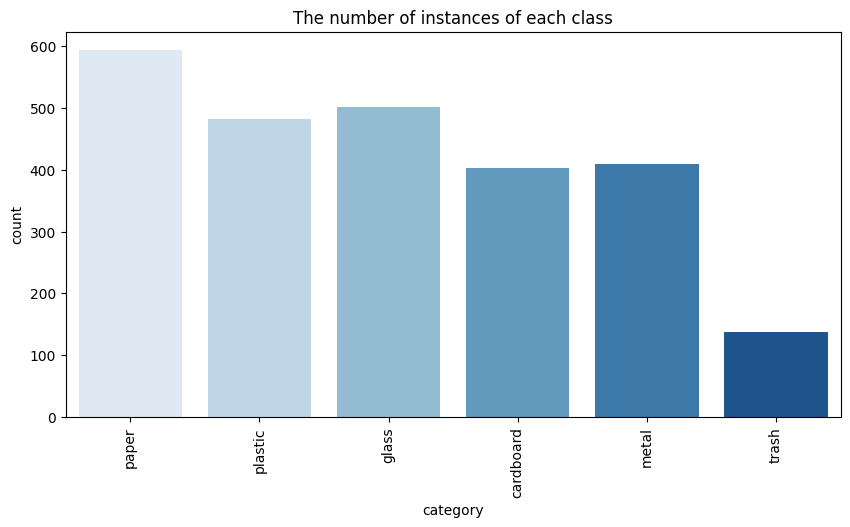

In [ ]:
#display the number of instances of each class/label
plt.figure(figsize=(10, 5))
sns.countplot(x="category", data=df, palette='Blues')
plt.xticks(rotation=90)
plt.title('The number of instances of each class')
plt.show()

In [ ]:
#split dataset into train data set, valiadation data set and  test data set
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify= df['category'])
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

len(train_df), len(val_df), len(test_df)

(2021, 253, 253)

In [ ]:
train_df.head(20)

,filename,category
0,trash/trash109.jpg,trash
1,glass/glass368.jpg,glass
2,glass/glass27.jpg,glass
3,paper/paper236.jpg,paper
4,metal/metal116.jpg,metal
5,metal/metal32.jpg,metal
6,metal/metal281.jpg,metal
7,metal/metal192.jpg,metal
8,metal/metal217.jpg,metal
9,plastic/plastic469.jpg,plastic


In [ ]:
train_unique = train_df['category'].value_counts()

In [ ]:
train_unique

paper        475
glass        401
plastic      385
metal        328
cardboard    322
trash        110
Name: category, dtype: int64

In [ ]:
#define parameters for loaders: batch size, random seed, image size
im_shape = (256, 256)
batch_size = 128
seed = 42

In [ ]:
train_ds, val_ds= tf.keras.utils.image_dataset_from_directory(
  base_path,
  labels= "inferred",
  label_mode = "categorical",
  class_names = ["cardboard" , "glass" , "metal" ,"paper" , "plastic", "trash"],
  validation_split=0.2,
  subset="both",
  seed = seed,
  image_size=(im_shape[0], im_shape[1]),
  batch_size=batch_size)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Using 505 files for validation.


In [ ]:
# val_ds= tf.keras.utils.image_dataset_from_directory(
#   base_path,
#   validation_split=0.1,
#   subset="validation",
#   labels= "inferred",
#   label_mode = "categorical",
#   class_names = ["cardboard" , "glass" , "metal" ,"paper" , "plastic", "trash"],
#   seed=seed,
#   image_size=(im_shape[0], im_shape[1]),
#   batch_size=batch_size)

Found 2527 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

AttributeError: ignored

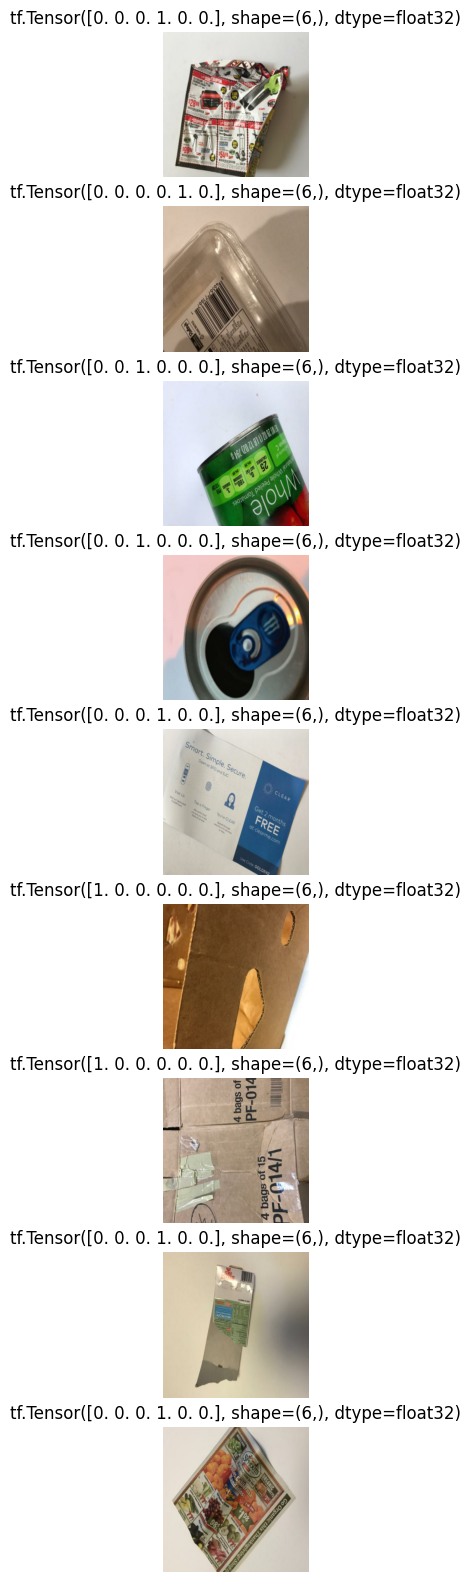

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(9, 1, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(str(labels[i]))
        plt.axis("off")

In [ ]:
#normalizer layer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
normalization_layer = layers.Rescaling(1./255)


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 256, 256, 3)
(128, 6)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(categories)

In [ ]:
#defining model


model = Sequential([
  layers.Rescaling(1./255, input_shape=(im_shape[0], im_shape[1], 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 262144)            0

In [ ]:
#train for model for 10 epochs
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
16/16 [==============================] - 393s 17s/step - loss: 8.0279 - accuracy: 0.1854 - val_loss: 1.7561 - val_accuracy: 0.2782
Epoch 2/10
16/16 [==============================] - 252s 16s/step - loss: 1.6200 - accuracy: 0.3201 - val_loss: 1.5087 - val_accuracy: 0.3992
Epoch 3/10
16/16 [==============================] - 259s 16s/step - loss: 1.4071 - accuracy: 0.4563 - val_loss: 1.3437 - val_accuracy: 0.4556
Epoch 4/10
16/16 [==============================] - 251s 16s/step - loss: 1.2544 - accuracy: 0.5111 - val_loss: 1.2750 - val_accuracy: 0.5685
Epoch 5/10
16/16 [==============================] - 252s 16s/step - loss: 1.0653 - accuracy: 0.6000 - val_loss: 1.2355 - val_accuracy: 0.5726
Epoch 6/10
11/16 [===================>..........] - ETA: 1:15 - loss: 0.9737 - accuracy: 0.6456

In [ ]:
history.history

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(im_shape[0],
                                  im_shape[1],
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
    # layers.RandomHeight(0.1),
    # layers.RandomWidth(0.1),
    # layers.RandomShear(0.1),
    # layers.RandomChannelShift(0.1),

  ]
)

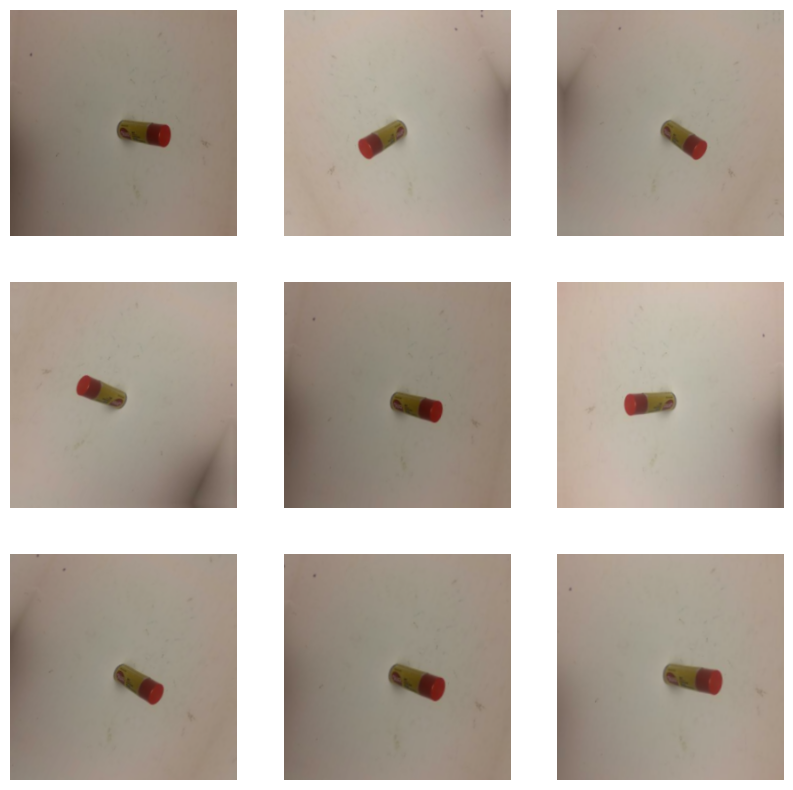

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.CategoricalAccuracy(name='CategoricalAccuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(im_shape[0], im_shape[1], 3)),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation ='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation ='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation ='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                 

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  # class_weight = class_weight_dict,
  epochs=epochs
)

Epoch 1/30
16/16 [==============================] - 24s 2s/step - loss: 1.0121 - tp: 1680.0000 - fp: 2565.0000 - tn: 7545.0000 - fn: 342.0000 - CategoricalAccuracy: 0.6058 - precision: 0.3958 - recall: 0.8309 - auc: 0.8379 - prc: 0.4453 - val_loss: 1.0039 - val_tp: 423.0000 - val_fp: 618.0000 - val_tn: 1907.0000 - val_fn: 82.0000 - val_CategoricalAccuracy: 0.6099 - val_precision: 0.4063 - val_recall: 0.8376 - val_auc: 0.8429 - val_prc: 0.4418
Epoch 2/30
16/16 [==============================] - 24s 2s/step - loss: 0.9754 - tp: 1685.0000 - fp: 2543.0000 - tn: 7567.0000 - fn: 337.0000 - CategoricalAccuracy: 0.6246 - precision: 0.3985 - recall: 0.8333 - auc: 0.8397 - prc: 0.4519 - val_loss: 0.9579 - val_tp: 437.0000 - val_fp: 656.0000 - val_tn: 1869.0000 - val_fn: 68.0000 - val_CategoricalAccuracy: 0.6277 - val_precision: 0.3998 - val_recall: 0.8653 - val_auc: 0.8469 - val_prc: 0.4503
Epoch 3/30
16/16 [==============================] - 24s 2s/step - loss: 0.9722 - tp: 1686.0000 - fp: 2496.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
def plot_metrics(history):
  metrics = ['loss','prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

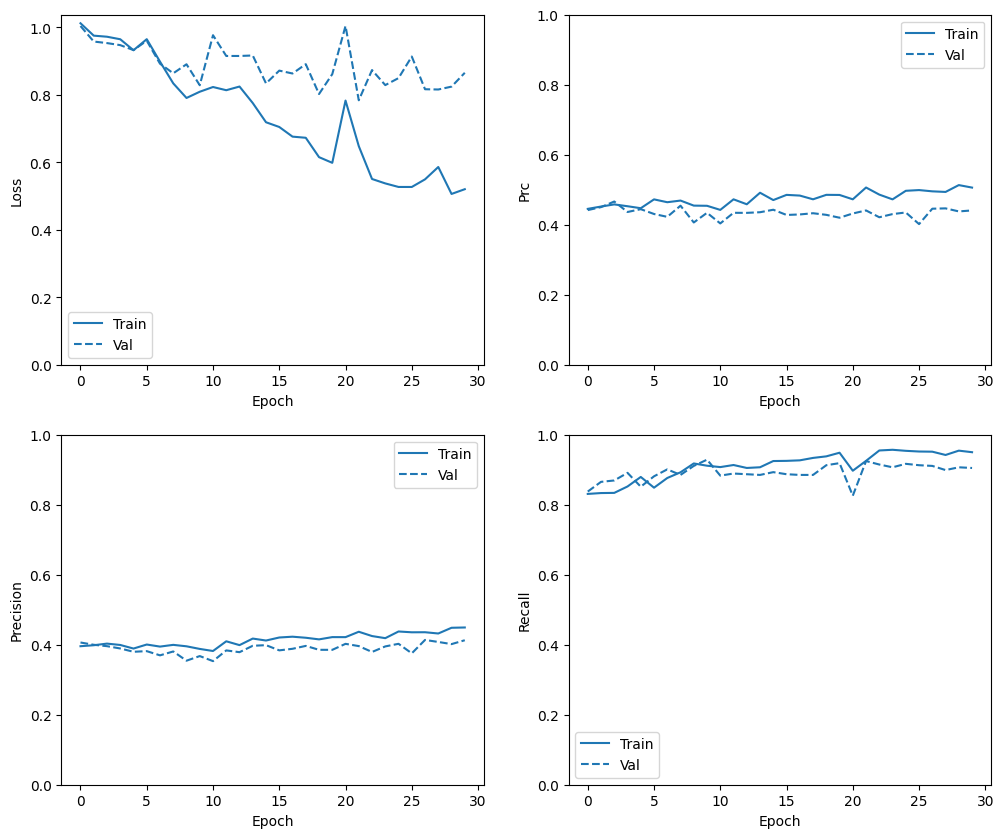

In [ ]:
plot_metrics(history)

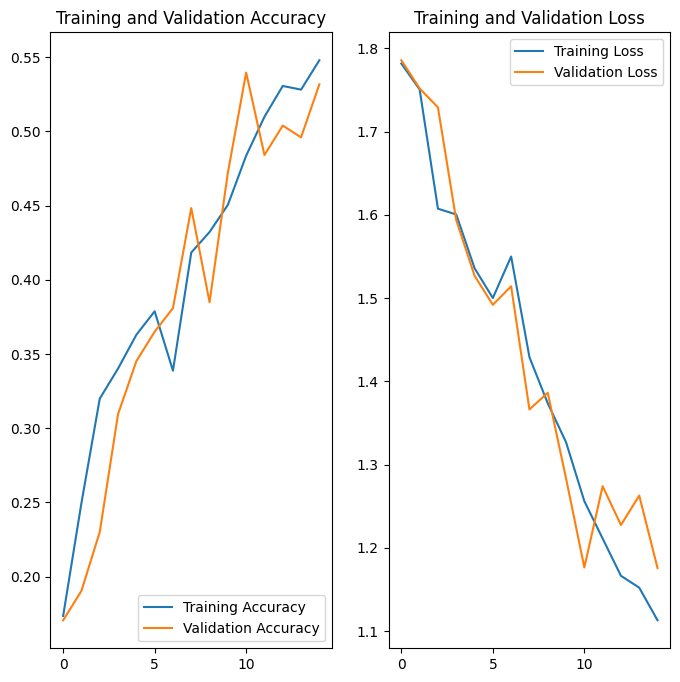

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
history.history

{'loss': [1.7818397283554077,
  1.7507134675979614,
  1.6074512004852295,
  1.6005136966705322,
  1.535995602607727,
  1.5001050233840942,
  1.5500255823135376,
  1.4290663003921509,
  1.3736690282821655,
  1.3268848657608032,
  1.2560352087020874,
  1.2111542224884033,
  1.1663724184036255,
  1.1520960330963135,
  1.1129190921783447],
 'accuracy': [0.1735905110836029,
  0.2497527152299881,
  0.3199802041053772,
  0.3402571678161621,
  0.36300691962242126,
  0.3788328468799591,
  0.3387734889984131,
  0.4183976352214813,
  0.43224531412124634,
  0.4505440294742584,
  0.48367953300476074,
  0.5098912119865417,
  0.5306627154350281,
  0.5281898975372314,
  0.5479723215103149],
 'val_loss': [1.785776138305664,
  1.751957893371582,
  1.7291481494903564,
  1.59377920627594,
  1.5270216464996338,
  1.491927146911621,
  1.5142202377319336,
  1.3662374019622803,
  1.3862757682800293,
  1.2834821939468384,
  1.1763663291931152,
  1.2740355730056763,
  1.2273904085159302,
  1.2627958059310913,
 

In [ ]:
img_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/test1.jpg'
img = image.load_img(img_path, target_size=(im_shape[0], im_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)


In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categories[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 152ms/step
This image most likely belongs to metal with a 50.90 percent confidence.


In [ ]:
img_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/test2.jpg'
img = image.load_img(img_path, target_size=(im_shape[0], im_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categories[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 84ms/step
This image most likely belongs to metal with a 81.72 percent confidence.


In [ ]:
img_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/test3.jpg'
img = image.load_img(img_path, target_size=(im_shape[0], im_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categories[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to metal with a 60.54 percent confidence.


In [ ]:
img_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/test4.jpg'
img = image.load_img(img_path, target_size=(im_shape[0], im_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categories[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to glass with a 48.23 percent confidence.


In [ ]:
# # compute class weight
# from sklearn.utils.class_weight import compute_class_weight
# y = partial_train_labels
# y = np.argmax(y, axis=1)
# class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y),y =  y)
# d_class_weights = dict(enumerate(class_weights))

In [ ]:
model.save('model3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('model3.keras')

In [ ]:
import shutil
shutil.make_archive("/dataset/model2", 'zip', "/content/model2")

'/dataset/model2.zip'

In [ ]:
import os
print(os.getcwd())


/content/gdrive/MyDrive/Colab Notebooks/dataset


In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
# class_names = train_df['category'].unique()
le = LabelEncoder()
encoder = le.fit(class_names)
encoded_labels = le.transform(train_df['category'])



In [ ]:
classes_names = np.unique(encoded_labels)

In [ ]:
classes_names

array([0, 1, 2, 3, 4, 5])

In [ ]:
y_labels = train_df['category'].value_counts()

In [ ]:
y_labels

paper        475
glass        401
plastic      385
metal        328
cardboard    322
trash        110
Name: category, dtype: int64

In [ ]:
class_weights = compute_class_weight('balanced', classes= np.unique(train_df['category']), y = train_df['category'].values)



In [ ]:
class_weight_dict = dict(zip(np.unique(train_df['category']), class_weights))

In [ ]:
class_weight_dict = {}

In [ ]:
class_weight_dict

{'cardboard': 1.0460662525879918,
 'glass': 0.8399833748960931,
 'metal': 1.026930894308943,
 'paper': 0.7091228070175438,
 'plastic': 0.8748917748917749,
 'trash': 3.062121212121212}

In [ ]:
encoded_labels

array([5, 1, 1, ..., 3, 1, 2])

In [ ]:
train_df['category'].unique()

array(['trash', 'glass', 'paper', 'metal', 'plastic', 'cardboard'],
      dtype=object)

In [ ]:
train_df['category'].value_counts()

paper        475
glass        401
plastic      385
metal        328
cardboard    322
trash        110
Name: category, dtype: int64

In [ ]:
for element in train_ds:
  print (element)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.


       [[[169.   , 128.   ,  74.   ],
         [169.   , 128.   ,  74.   ],
         [169.   , 128.   ,  74.   ],
         ...,
         [128.25 ,  88.25 ,  36.25 ],
         [128.25 ,  88.25 ,  36.25 ],
         [128.25 ,  88.25 ,  36.25 ]],

        [[169.   , 128.   ,  74.   ],
         [169.   , 128.   ,  74.   ],
         [169.   , 128.   ,  74.   ],
         ...,
         [129.   ,  89.   ,  37.   ],
         [129.   ,  89.   ,  37.   ],
         [129.   ,  89.   ,  37.   ]],

        [[169.   , 128.   ,  74.   ],
         [169.   , 128.   ,  74.   ],
         [169.   , 128.   ,  74.   ],
         ...,
         [130.25 ,  90.25 ,  38.25 ],
         [130.25 ,  90.25 ,  38.25 ],
         [130.25 ,  90.25 ,  38.25 ]],

        ...,

        [[240.   , 222.   , 200.   ],
         [240.75 , 222.75 , 200.75 ],
         [239.5  , 221.5  , 199.5  ],
         ...,
         [108.   , 131.   , 145.   ],
         [107.125, 

In [ ]:
def add_sub(categories, base_path):
    for category in categories:
        # Join the base_path with the current category to get the full path
        category_path = os.path.join(base_path, category)

        # List the subdirectories in the current category_path
        sub_dir = sorted(os.listdir(category_path))

        # Print the sorted list of subdirectories for the current category
        print(f"Subdirectories for category '{category}': {sub_dir}")

categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
base_path = "/content/gdrive/MyDrive/Colab Notebooks/dataset/Garbage classification/Garbage classification/"

add_sub(categories, base_path)


Subdirectories for category 'cardboard': ['cardboard1.jpg', 'cardboard10.jpg', 'cardboard100.jpg', 'cardboard101.jpg', 'cardboard102.jpg', 'cardboard103.jpg', 'cardboard104.jpg', 'cardboard105.jpg', 'cardboard106.jpg', 'cardboard107.jpg', 'cardboard108.jpg', 'cardboard109.jpg', 'cardboard11.jpg', 'cardboard110.jpg', 'cardboard111.jpg', 'cardboard112.jpg', 'cardboard113.jpg', 'cardboard114.jpg', 'cardboard115.jpg', 'cardboard116.jpg', 'cardboard117.jpg', 'cardboard118.jpg', 'cardboard119.jpg', 'cardboard12.jpg', 'cardboard120.jpg', 'cardboard121.jpg', 'cardboard122.jpg', 'cardboard123.jpg', 'cardboard124.jpg', 'cardboard125.jpg', 'cardboard126.jpg', 'cardboard127.jpg', 'cardboard128.jpg', 'cardboard129.jpg', 'cardboard13.jpg', 'cardboard130.jpg', 'cardboard131.jpg', 'cardboard132.jpg', 'cardboard133.jpg', 'cardboard134.jpg', 'cardboard135.jpg', 'cardboard136.jpg', 'cardboard137.jpg', 'cardboard138.jpg', 'cardboard139.jpg', 'cardboard14.jpg', 'cardboard140.jpg', 'cardboard141.jpg', 'card

In [ ]:
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
class_names = sorted(os.listdir(os.path.join(base_path, 'training')))

# Create a dictionary mapping class names to their indices
class_indices = dict(zip(class_names, range(len(class_names))))

# Print the class indices
print("Class Indices:", class_indices)

FileNotFoundError: ignored

In [ ]:
train_df.describe()

,filename,category
count,2021,2021
unique,2021,6
top,trash/trash122.jpg,paper
freq,1,475


In [ ]:
2021 /(6*110)

3.062121212121212

In [ ]:
train_unique

paper        475
glass        401
plastic      385
metal        328
cardboard    322
trash        110
Name: category, dtype: int64

In [ ]:
unique_class

paper        594
glass        501
plastic      482
metal        410
cardboard    403
trash        137
Name: category, dtype: int64

In [ ]:
class_weight_dict

{0: 1.0460662525879918,
 1: 0.8399833748960931,
 2: 1.026930894308943,
 3: 0.7091228070175438,
 4: 0.8748917748917749,
 5: 3.062121212121212}

In [ ]:
# build model for keras tuner
def build_model(hp):
    model = keras.Sequential()
    data_augmentation
    model.add(tf.layers.Rescalling(1./255))
    model.add(tf.keras.layers.Input(shape=(im_shape[0],im_shape[1],3)))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 3,7)):
        model.add(
            layers.Conv2D(
                # Tune number of units separately.
                filters=hp.Int(f"units_{i}", min_value=16, max_value=256, step=16),
                kernel_size= 3, padding = "same",
                activation = hp.Choice("activation", ["relu","tanh"])
            )
        )
        model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    # if hp.Boolean("dropout"):
    #     model.add(layers.Dropout(rate=hp.Float(min=0.2, max = 0.5, step=0.1)))

    for i in range (hp.Int("num_dense_layers",3,7)):
      model.add(layers.Dense(
          units= hp.Int(f"units_dense_{i}", min_value = 32, max_value = 256, step = 16),
          activation = hp.Choice ("activation_dense", values=["relu","tanh"])
      ))
    model.add(layers.Dense(6, activation="softmax"))
    learning_rate = hp.Float("lr", min_value=3e-4, max_value=3e-2, sampling="log")
    optimizer = hp.Choice ("optimizer", values=["adam", "RMSprop"])

    if optimizer == "adam":
        optimizer_instance = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "RMSprop":
        optimizer_instance = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer choice")

        # Add early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
    )

    model.compile(
        optimizer= optimizer_instance,
        loss="categorical_crossentropy",
        metrics=["accuracy","Precision","Recall"],
    )
    return model

In [ ]:
from tensorflow.keras import layers

tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_loss", direction = "min"),
    max_epochs=5,
    # executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="My_cnn_tuning",
)

In [ ]:
tuner.search_space_summary()


In [ ]:
tuner.search(train_ds, epochs=2, validation_data=(val_ds),
             callbacks =[early_stopping],
            class_weight=class_weight_dict,)


In [ ]:
models = tuner.get_best_models(num_models=2)


In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials =1)[0]
# print(f"BEST num neurons for Dense Layer : {best_hp.get("units")}")
print(f"BEST learning_rate : {best_hp.get('lr')}")
print(f"BEST num layers : {best_hp.get('num_layers')}")

In [ ]:
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(5,))
best_model.summary()

In [ ]:
tuner.results_summary()
